In [1]:
from pcpptc.grid_solver import GridSolver

print(GridSolver().description())

Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 6 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 times.
------------------------------
Local Relaxation Tour Optimization:
- Like CC version but trying to reconnect unconnected solutions up to 10 times.
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 tim

<Figure size 432x288 with 0 Axes>

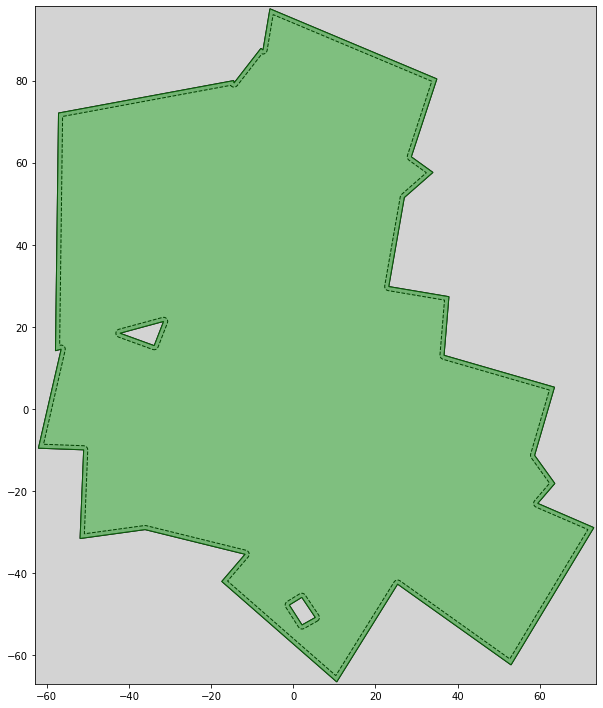

In [2]:
from pcpptc.plot import setup_plot, plot_polygon_instance
from pcpptc import PolygonInstance
import matplotlib.pyplot as plt

instance = PolygonInstance.from_json(file_path="../01_grid/instances/92.instance.json")
ax = setup_plot()
plot_polygon_instance(ax, instance)
plt.show()

<Figure size 432x288 with 0 Axes>

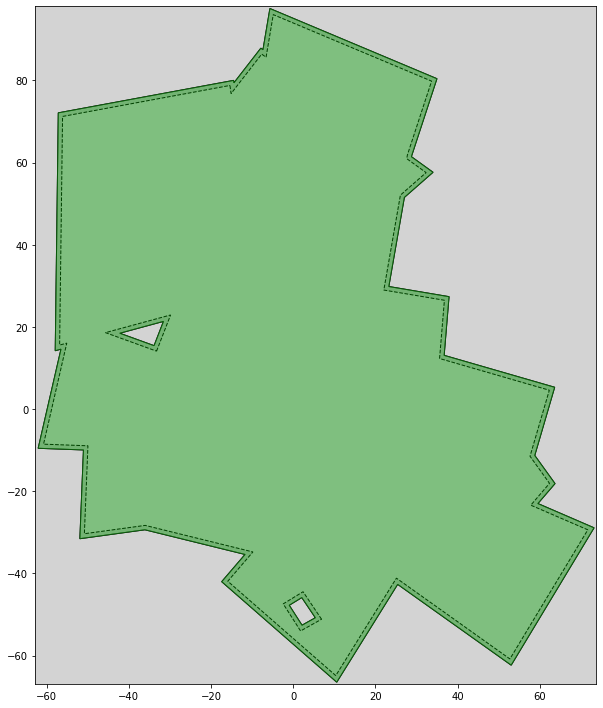

In [8]:
poly = instance.original_area.buffer(-instance.tool_radius, cap_style=2, join_style=2)
poly = poly.buffer(-0.05 * instance.tool_radius, cap_style=2, join_style=2)
poly = poly.simplify(0.1 * instance.tool_radius)
instance.feasible_area = poly
ax = setup_plot()
plot_polygon_instance(ax, instance)
plt.show()

In [9]:
from pcpptc.instance_converter.dmsh import DmshGrid, GmshGrid
from pcpptc.solver_selection.abstract_solver import PolygonInstanceSolver


class Solver(PolygonInstanceSolver):
    def identifier(self) -> str:
        return "Bla"


pis = Solver(GmshGrid(full_coverage=True, point_based=False, hard_corners=True))
tour = pis(instance)

using gmesh with Packing of Parallelograms
Good options are 1, 4, and 9.
Converting polygon instance to grid instance...
Optimize grid with CVT-full
Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 6 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 times.
------------------------------
Local Relaxation Tour Optimization:
- Like CC version but trying to reconnect unconnected solutions up to 10 times.
 - AreaSelector with area size 50.
        

In [ ]:
from pcpptc.plot import plot_solution

ax = setup_plot()
plot_polygon_instance(ax, instance)
plot_solution(ax, tour)
plt.show()